In [1]:
import os
import pandas as pd
import numpy as np
from stackregression import stack_regression_step1, stack_regression_step2, print_prediction_report
from utils import encode_numeric_zscore_list, encode_numeric_zscore_all, to_xy
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from scipy.sparse import csr_matrix
from xgboost import XGBRegressor
from random import randint
import xgboost as xgb

/home/arvc/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using Theano backend.


In [2]:
#Read Input CSV file
path = "./data/self"
inputFilePath = os.path.join(path, "TestRegression.csv")
#df = pd.read_csv(inputFilePath, compression="zip", header=0, na_values=['NULL'])
df = pd.read_csv(inputFilePath, header=0, na_values=['NULL'])
x,y = to_xy(df, "Label")
x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size=0.20, random_state=43)


float64


In [3]:
xgtrain = xgb.DMatrix(x_train, label=y_train)
xgvalid = xgb.DMatrix(x_valid, label=y_valid)

In [4]:
#best params on 11/1 for 85% train data: {'subsample': 1.0, 'n_estimators': 174.0, 'eta': 0.1, 
#'colsample_bytree': 0.4, 'gamma': 0.2, 'min_child_weight': 1.0, 'max_depth': 3}

RANDOM_STATE = randint(1,429496)
params = {
    'min_child_weight': 1,
    'eta': 0.1,
    'colsample_bytree': 0.5,
    'max_depth': 12,
    'subsample': 0.8,
    'alpha': 1,
    'gamma': 1,
    'silent': 1,
    'verbose_eval': False,
    'seed': RANDOM_STATE,
    'eval_metric': 'mae',
    'objective': 'reg:linear',
}
watchlist = [(xgtrain, 'train'), (xgvalid, 'eval')]   
model = xgb.train(params, xgtrain, 100000, watchlist, early_stopping_rounds=300, verbose_eval=100)  


[0]	train-mae:330.862	eval-mae:320.329
Multiple eval metrics have been passed: 'eval-mae' will be used for early stopping.

Will train until eval-mae hasn't improved in 300 rounds.
[100]	train-mae:18.4196	eval-mae:38.3938
[200]	train-mae:11.4753	eval-mae:32.9095
[300]	train-mae:8.46997	eval-mae:30.1869
[400]	train-mae:6.98616	eval-mae:28.7684
[500]	train-mae:6.18352	eval-mae:27.7971
[600]	train-mae:5.57777	eval-mae:26.8002
[700]	train-mae:5.04152	eval-mae:26.0911
[800]	train-mae:4.64248	eval-mae:25.4434
[900]	train-mae:4.27276	eval-mae:24.7759
[1000]	train-mae:4.01328	eval-mae:24.3684
[1100]	train-mae:3.74071	eval-mae:23.9558
[1200]	train-mae:3.55198	eval-mae:23.4874
[1300]	train-mae:3.40277	eval-mae:23.1407
[1400]	train-mae:3.22334	eval-mae:22.7592
[1500]	train-mae:3.09924	eval-mae:22.5023
[1600]	train-mae:2.98631	eval-mae:22.352
[1700]	train-mae:2.88477	eval-mae:22.0925
[1800]	train-mae:2.79072	eval-mae:21.8207
[1900]	train-mae:2.70766	eval-mae:21.6404
[2000]	train-mae:2.64193	eval-m

In [7]:
predictions = model.predict(xgvalid)
predictions

array([  2.33756088e+02,   8.23087585e+02,   2.93459137e+02,
         2.23369522e+02,   1.87254257e+02,   3.07151520e+02,
         7.10015137e+02,   6.74835999e+02,   8.53519516e+01,
         1.93848095e+01,   8.35177231e+01,   3.87295410e+02,
         5.10970879e+01,   2.13156372e+02,   7.95487213e+01,
         9.04965019e+00,   1.39839645e+02,   4.96125214e+02,
         8.45960815e+02,   1.65965347e+02,   3.85474365e+02,
         1.12080812e+01,   4.69380707e+02,   2.08623459e+02,
         3.11982117e+02,   4.78376556e+02,   7.49822632e+02,
         1.69424438e+02,   4.20627960e+02,   4.77631256e+02,
         8.30738297e+01,   4.79252319e+02,   1.81699966e+02,
         1.20412308e+02,   4.88348312e+01,   4.75990509e+02,
         1.25487732e+03,   1.22208153e+02,   1.00871262e+02,
         1.21528015e+02,   7.33333557e+02,   6.71861328e+02,
         1.20052393e+03,   1.78649261e+02,   3.08227081e+02,
         4.40458099e+02,   5.43160889e+02,   2.77315636e+01,
         2.82393494e+02,

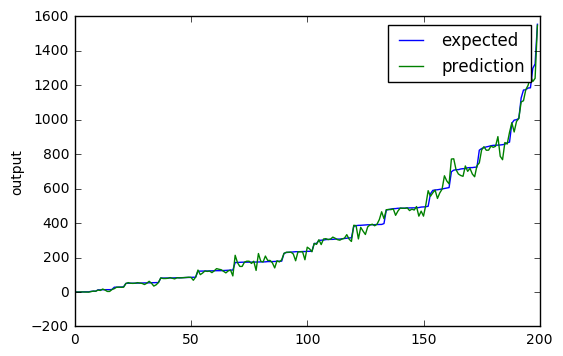

In [8]:
from utils import chart_regression
chart_regression(predictions, y_valid)